Using Numpy for Computations. Pandas for handling dataframes.Matplotlib and seaborn for data visualization. Ecommerce Customers.csv dataset was used from Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Pandas dataframe to load dataset 

In [2]:
df=pd.read_csv("F:\iOPTIME Internship\Ecommerce Customers.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\awans\AppData\Local\Temp\ipykernel_13916\1614151385.py:1: SyntaxWarning: invalid escape sequence '\i'
  df=pd.read_csv("F:\iOPTIME Internship\Ecommerce Customers.csv")


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

df.columns methods was used to display names of columns

In [5]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Now we will find Coorelation to find relationships between independent and dependent Values

In [6]:
df_corr=df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
df_corr.corr()['Yearly Amount Spent']


Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

Making a heatmap of Seaborn for Correlations

<Axes: >

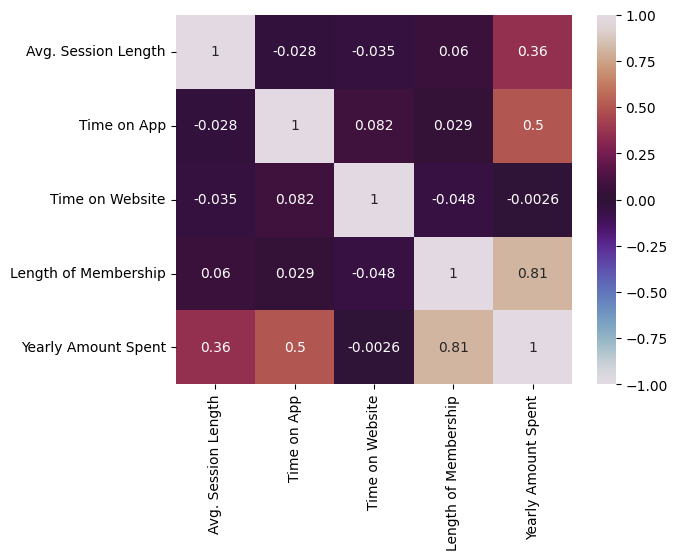

In [7]:
sns.heatmap(df_corr.corr(), annot=True, cmap='twilight', vmin=-1, vmax=1)

We place the two strongly correlated values with the dependent value

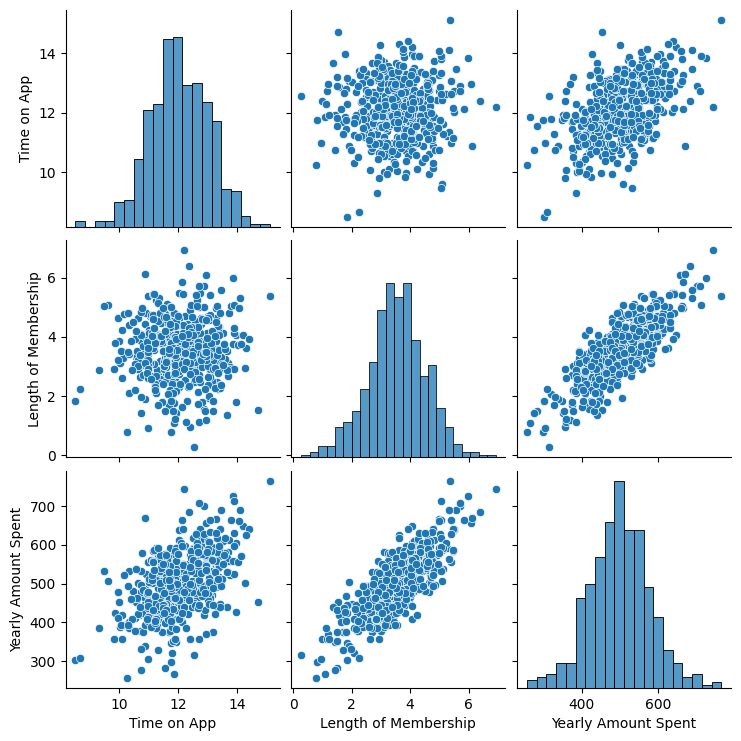

In [8]:
df=df_corr[['Time on App','Length of Membership','Yearly Amount Spent']]
sns.pairplot(df)
plt.show()

Length of Membership and Time on App have a stronger Correlation with Yearly Amount Spent

Making Functions for code readibility . Slope Function calculated the slope of the best fit line.
In numerator, we take summation of product of  two terms.

Term 1 cantains mean of independent values subtracted from the original independent values. Term 2 cantains subtraction of mean of dependent values from the original dependent values. 

Denominator cantains summation of mean of independent values subtracted from the original independent whole squared.

The final slope is calculated by dividing the numerator by denominator.



In [9]:
def Slope(indep,dep):
    return np.sum((indep-np.mean(indep))*(dep-np.mean(dep))) / np.sum((indep-np.mean(indep))**2)
def Intercept(indep,dep):
    return np.mean(dep)-Slope(indep,dep)*np.mean(indep)
def predict(slope,value,intercept):
    return slope*value+intercept
def plot(independent,dependent,slope,intercept):
    plt.scatter(x=independent,y=dependent)
    plt.plot(independent,slope*independent+intercept,color='red')
    plt.show()

Taking Avg. Session length as dependent and Yealy Amount Spent as independent. Having a weak correlation. The predicted values are not accurate

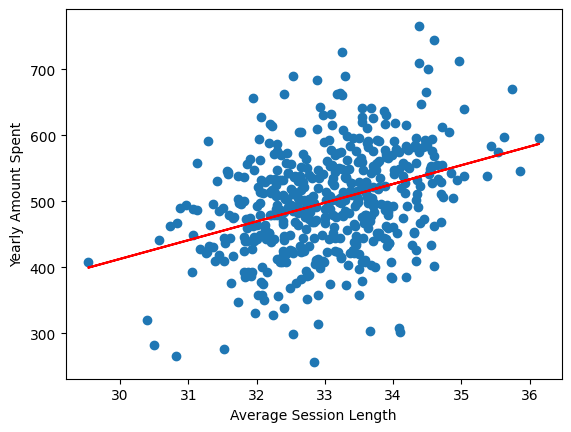

3051.5340331760767


In [10]:
independent=df_corr['Avg. Session Length']
dependent=df['Yearly Amount Spent']
slope=Slope(independent,dependent)
intercept=Intercept(independent,dependent)
plt.xlabel('Average Session Length')
plt.ylabel('Yearly Amount Spent')
plot(independent,dependent,slope,intercept)

num=123
predicted_value=predict(slope,num,intercept)
print(predicted_value)


Time on App as Independent and Yearly Amount Spent as Dependent

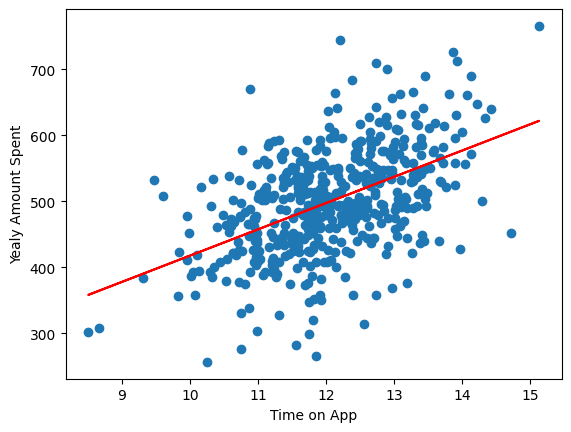

952.531443512215


In [11]:
independent=df['Time on App']
dependent=df['Yearly Amount Spent']
slope=Slope(independent,dependent)
intercept=Intercept(independent,dependent)
plt.xlabel('Time on App')
plt.ylabel('Yealy Amount Spent')
plot(independent,dependent,slope,intercept)

num=23.43
predicted_value=predict(slope,num,intercept)
print(predicted_value)

Time on Website as Independent and Yearly Amount Spent as Dependent

In [12]:
independent=df['Time on Website']
dependent=df['Yearly Amount Spent']
slope=Slope(independent,dependent)
intercept=Intercept(independent,dependent)
plt.xlabel('Time on Website')
plt.ylabel('Yealy Amount Spent')
plot(independent,dependent,slope,intercept)

num=324
predicted_value=predict(slope,num,intercept)
print(predicted_value)

KeyError: 'Time on Website'

Taking Length as independent and Yearly Amount spent as dependent

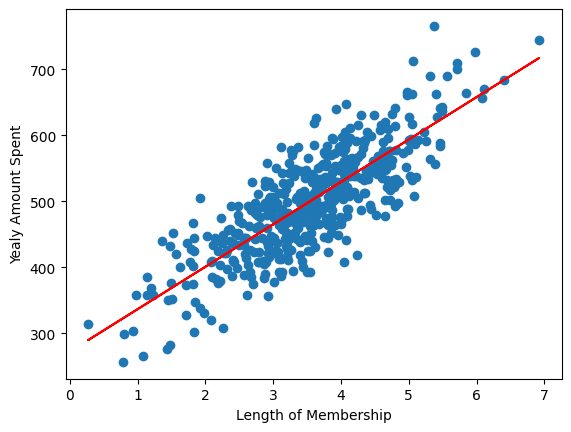

563.4645508499825


In [ ]:
independent=df['Length of Membership']
dependent=df['Yearly Amount Spent']
slope=Slope(independent,dependent)
intercept=Intercept(independent,dependent)
plt.xlabel('Length of Membership')
plt.ylabel('Yealy Amount Spent')
plot(independent,dependent,slope,intercept)

num=4.5324
predicted_value=predict(slope,num,intercept)
print(predicted_value)